# Использование `K-means` для сжатия


Еще одно полезное применение кластеризации — сжатие изображений. Схема до удивления проста: похожие, рядом расположенные цвета, стоит объединить в один цвет. Давайте провернем это самостоятельно.

Считайте изображение из вашего индивидуального задания.

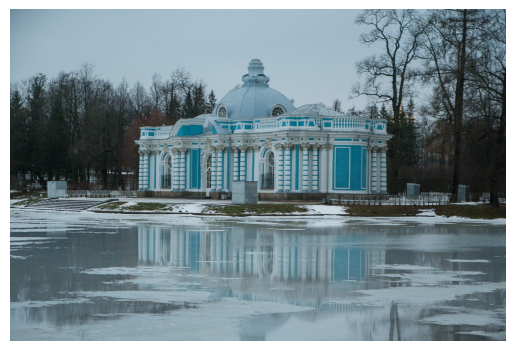

In [390]:
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('../ML/datasets/spb_barocco.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

Перед нами трехканальное (RGB) изображение. Вычислите среднее значение интенсивности пикселей по всем каналам.

In [391]:
img.mean()

121.34155988366433

Нормируйте значения интенсивностей пикселей, разделив все значения на $255$. Вычислите среднее значение интенсивности пикселей по всем каналам после проделанного преобразования.

In [392]:
img = img/255

Давайте убедимся в том, что исходное пространство цветов, насчитывающее около $16$ миллионов возможных состояний ($256^3$), слишком велико, и его размерность можно понижать. Для наглядности построим лишь некоторые подвыборки зависимостей значений интенсивностей и лишь на случайном поднаборе пикселей.

«Распрямите» изображение так, чтобы <code>.shape</code> соответствущего массива имел вид <code>(высота * ширина, 3)</code>

In [393]:
# Функция принимает на вход "распрямленный" массив, соответствующий изображению

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

In [394]:
reshaped_img = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

In [395]:
reshaped_img.shape

(1095680, 3)

Переведем 16 миллионов возможностей во всего-навсего 16 возможностей, используя <code>K-means</code>. Правда, чтобы ускорить работу алгоритма, мы будем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html"><code>K-means</code> на батчах</a> — поднаборах данных. Заодно увидим, портит ли это результат.

Обучите модель <code>MiniBatchKMeans</code> на нормированном и «распрямленном» изображении с параметрами, указанными в вашем задании.

В изображении замените значения цветов каждого пикселя на значения координат центроида кластера к которому был отнесен этот пиксель. Постройте графики зависимостей цветов при помощи <code>plot_pixels()</code> с новой палитрой (параметр <code>colors</code>)


In [396]:
from sklearn.cluster import MiniBatchKMeans

mbkmeans = MiniBatchKMeans(n_clusters=16, random_state=12)
mbkmeans.fit(reshaped_img)

c:\Users\eugen\anaconda3\envs\python3-10\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
c:\Users\eugen\anaconda3\envs\python3-10\lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=16, random_state=12)

In [397]:
clusters = mbkmeans.cluster_centers_
clusters

array([[0.50667485, 0.59757785, 0.638066  ],
       [0.12435253, 0.14302989, 0.13263265],
       [0.21255822, 0.29312863, 0.32430568],
       [0.65683225, 0.74410308, 0.79281159],
       [0.37721251, 0.4499712 , 0.47697058],
       [0.59833346, 0.68718691, 0.73070494],
       [0.28046293, 0.34066858, 0.36023896],
       [0.06262938, 0.39562842, 0.48101575],
       [0.42809613, 0.51087763, 0.54430082],
       [0.17127025, 0.19882779, 0.1956948 ],
       [0.32365533, 0.3911295 , 0.41579021],
       [0.07097618, 0.09072739, 0.08368543],
       [0.2276484 , 0.25719926, 0.25282003],
       [0.30561042, 0.48575927, 0.54860455],
       [0.55005748, 0.639551  , 0.68060612],
       [0.46447748, 0.5594527 , 0.59881491]])

In [398]:
cls = mbkmeans.predict(reshaped_img)

In [399]:
new_img = np.array(reshaped_img)

In [401]:
for i in range(len(reshaped_img)):
	new_img[i] = clusters[cls[i]]

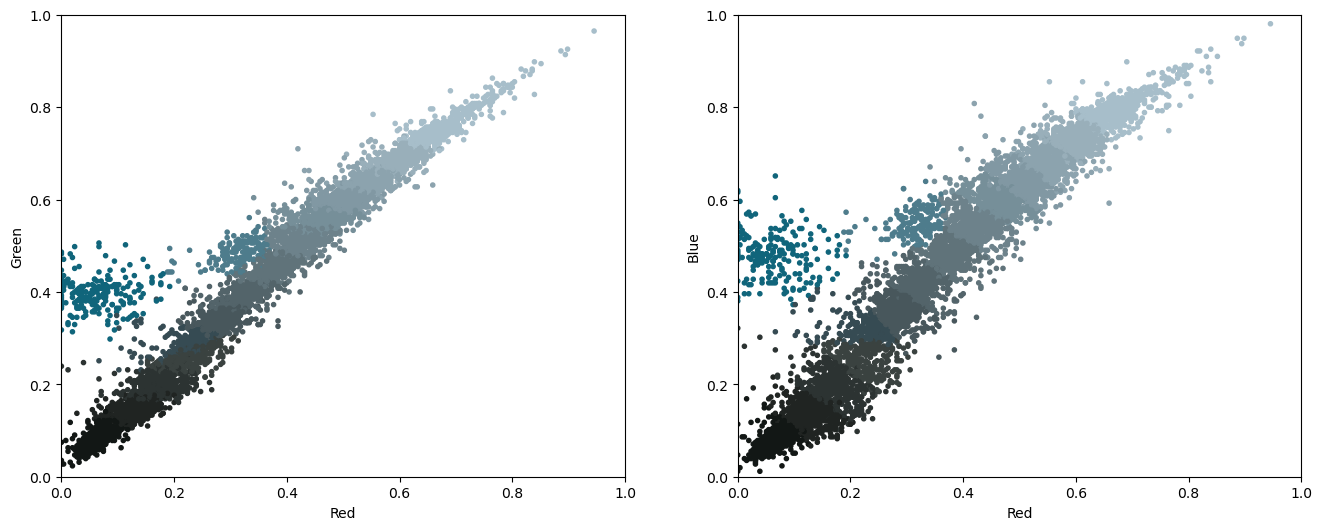

In [409]:
plot_pixels(reshaped_img, colors=new_img)

Вычислите среднее значение интенсивности пикселей полученного изображения.

In [403]:
new_img.mean()

0.47528867181524426

Выберите номер изображения, соответствующего палитре из $16$ цветов.

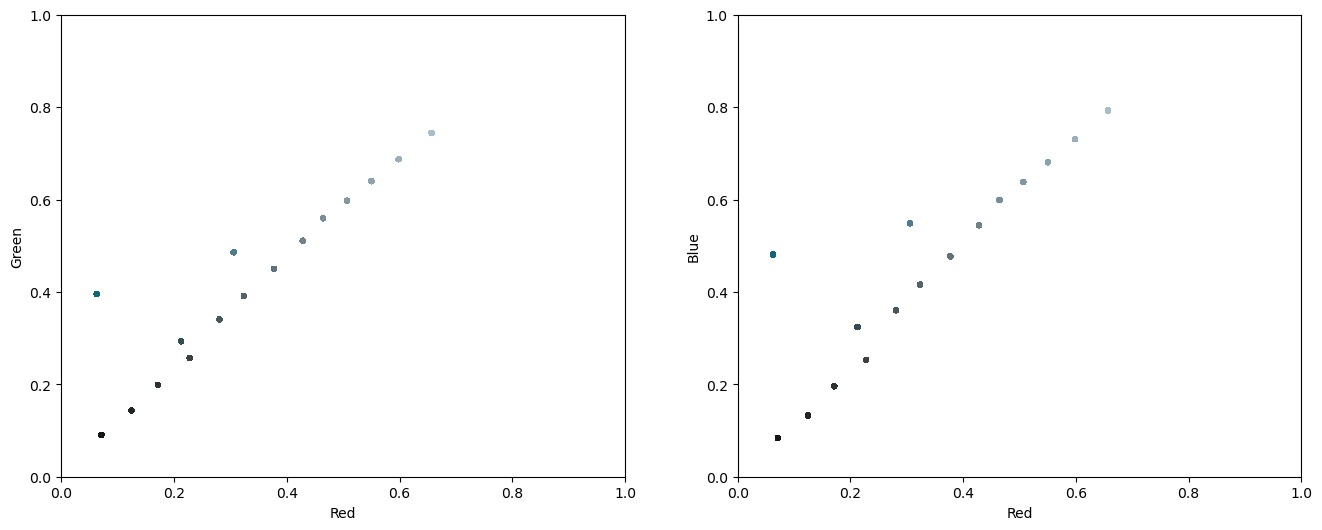

In [411]:
plot_pixels(new_img)

Пора смотреть на результат! Постройте рядом оригинальное изображение и изображение, в котором используется лишь $16$ цветов.

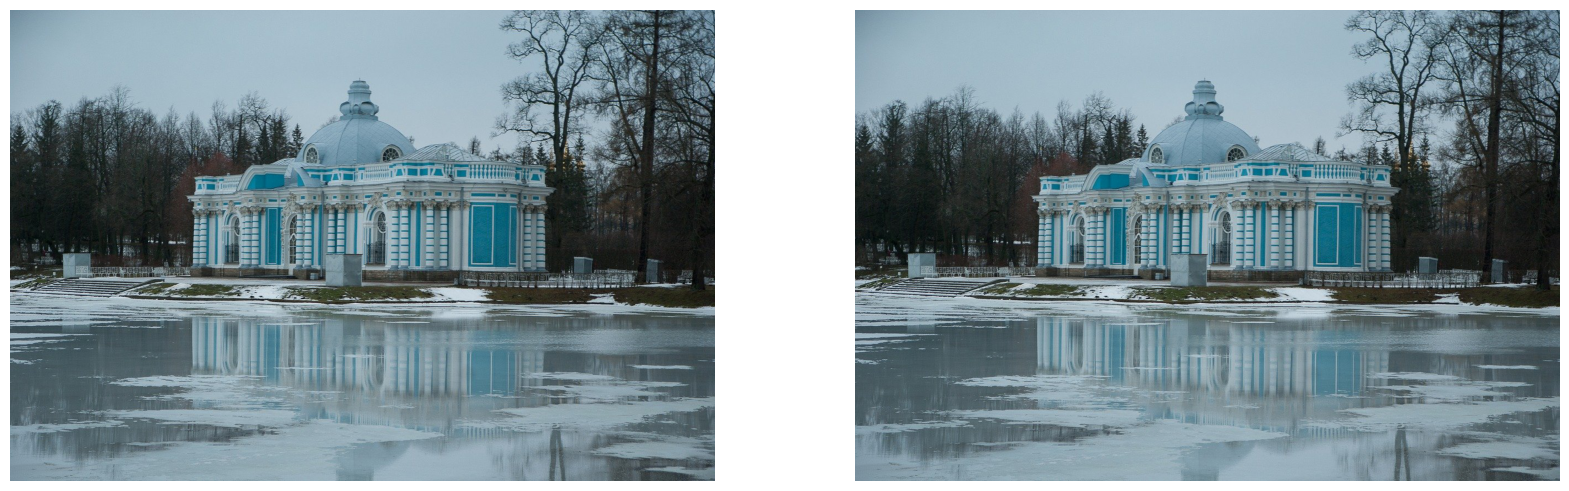

In [446]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].axis('off')
ax[0].imshow(img)
ax[1].axis('off')
ax[1].imshow(img)

Постройте изображение размера $4 \times 4$ на основе полученных $16$ цветов. Выберите верное изображение.

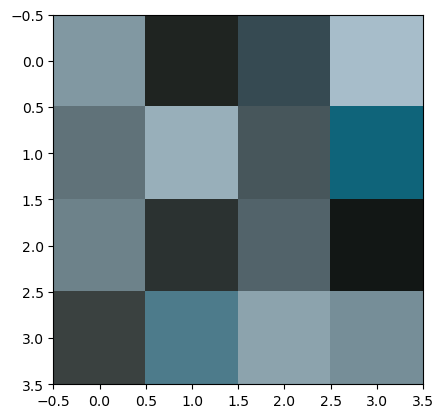

In [412]:
plt.imshow(clusters.reshape(4, 4, 3))